### _CSCN8010-Foundations of Machine Learning_
## **Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)**

### **Problem Definition**
>The objective of this project is to perform an Exploratory Data Analysis (EDA) on the Fashion-MNIST (fMNIST) dataset and train a neural network model using TensorFlow. The dataset consists of 70,000 grayscale images of clothing items, each 28x28 pixels in size, categorized into 10 classes. The goal is to develop a deep learning model that accurately classifies these images into their respective categories.

### __About the Data:__

>__Data Description:__
>
>The Fashion-MNIST dataset consists of grayscale images of various clothing articles. It serves as a replacement for the classic MNIST dataset of handwritten >digits, sharing the same image size (28x28 pixels) and split structure (60,000 training images, 10,000 testing images).
>
>__Key Points:__
>- Images: 28x28 grayscale pixels (784 total per image)
>- Labels: 10 categories representing clothing types (e.g., T-shirt, dress, sneaker)
>- Splits: 60,000 training images, 10,000 testing images
>- Data Format: CSV format (converted from original source)
>- Pixel Values: Range from 0 (black) to 255 (white)
>
>__Accessing the Data:__
>
>Source of CSV: [https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_test.csv](https://www.kaggle.com/code/>abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_test.csv)
>
>Original dataset: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)
>

### **Exploratory Data Analysis (EDA)**

- Importing necessory libraries

In [149]:
import pandas as pd 
import numpy as np
import seaborn as sns
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.calibration import CalibratedClassifierCV


- Loading train and test dataset from CSVs

In [150]:
df_train = pd.read_csv("datasets/fashion-mnist_train.csv")
df_test = pd.read_csv("datasets/fashion-mnist_test.csv")

- Let's check how many images we have for each label in train and test datasets.

In [151]:
# For train data set
df_train["label"].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [152]:
# For test dataset
df_test["label"].value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64


>As from the output, we can observe that data for labels are evenly distributed for both train and test datasets.


- Converting data into numpy arrays

In [153]:
X_train = df_train.drop('label', axis=1).values
y_train = df_train.label

X_test = df_test.drop('label', axis=1).values
y_test = df_test.label

### __Explore the data__

+ Checking the size of training and testing dataset

In [154]:
print(f'Size of train dataset: {X_train.shape}')
print(f'Size of test dataset: {X_test.shape}')

Size of train dataset: (60000, 784)
Size of test dataset: (10000, 784)


In [155]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [157]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


### __Visualization__

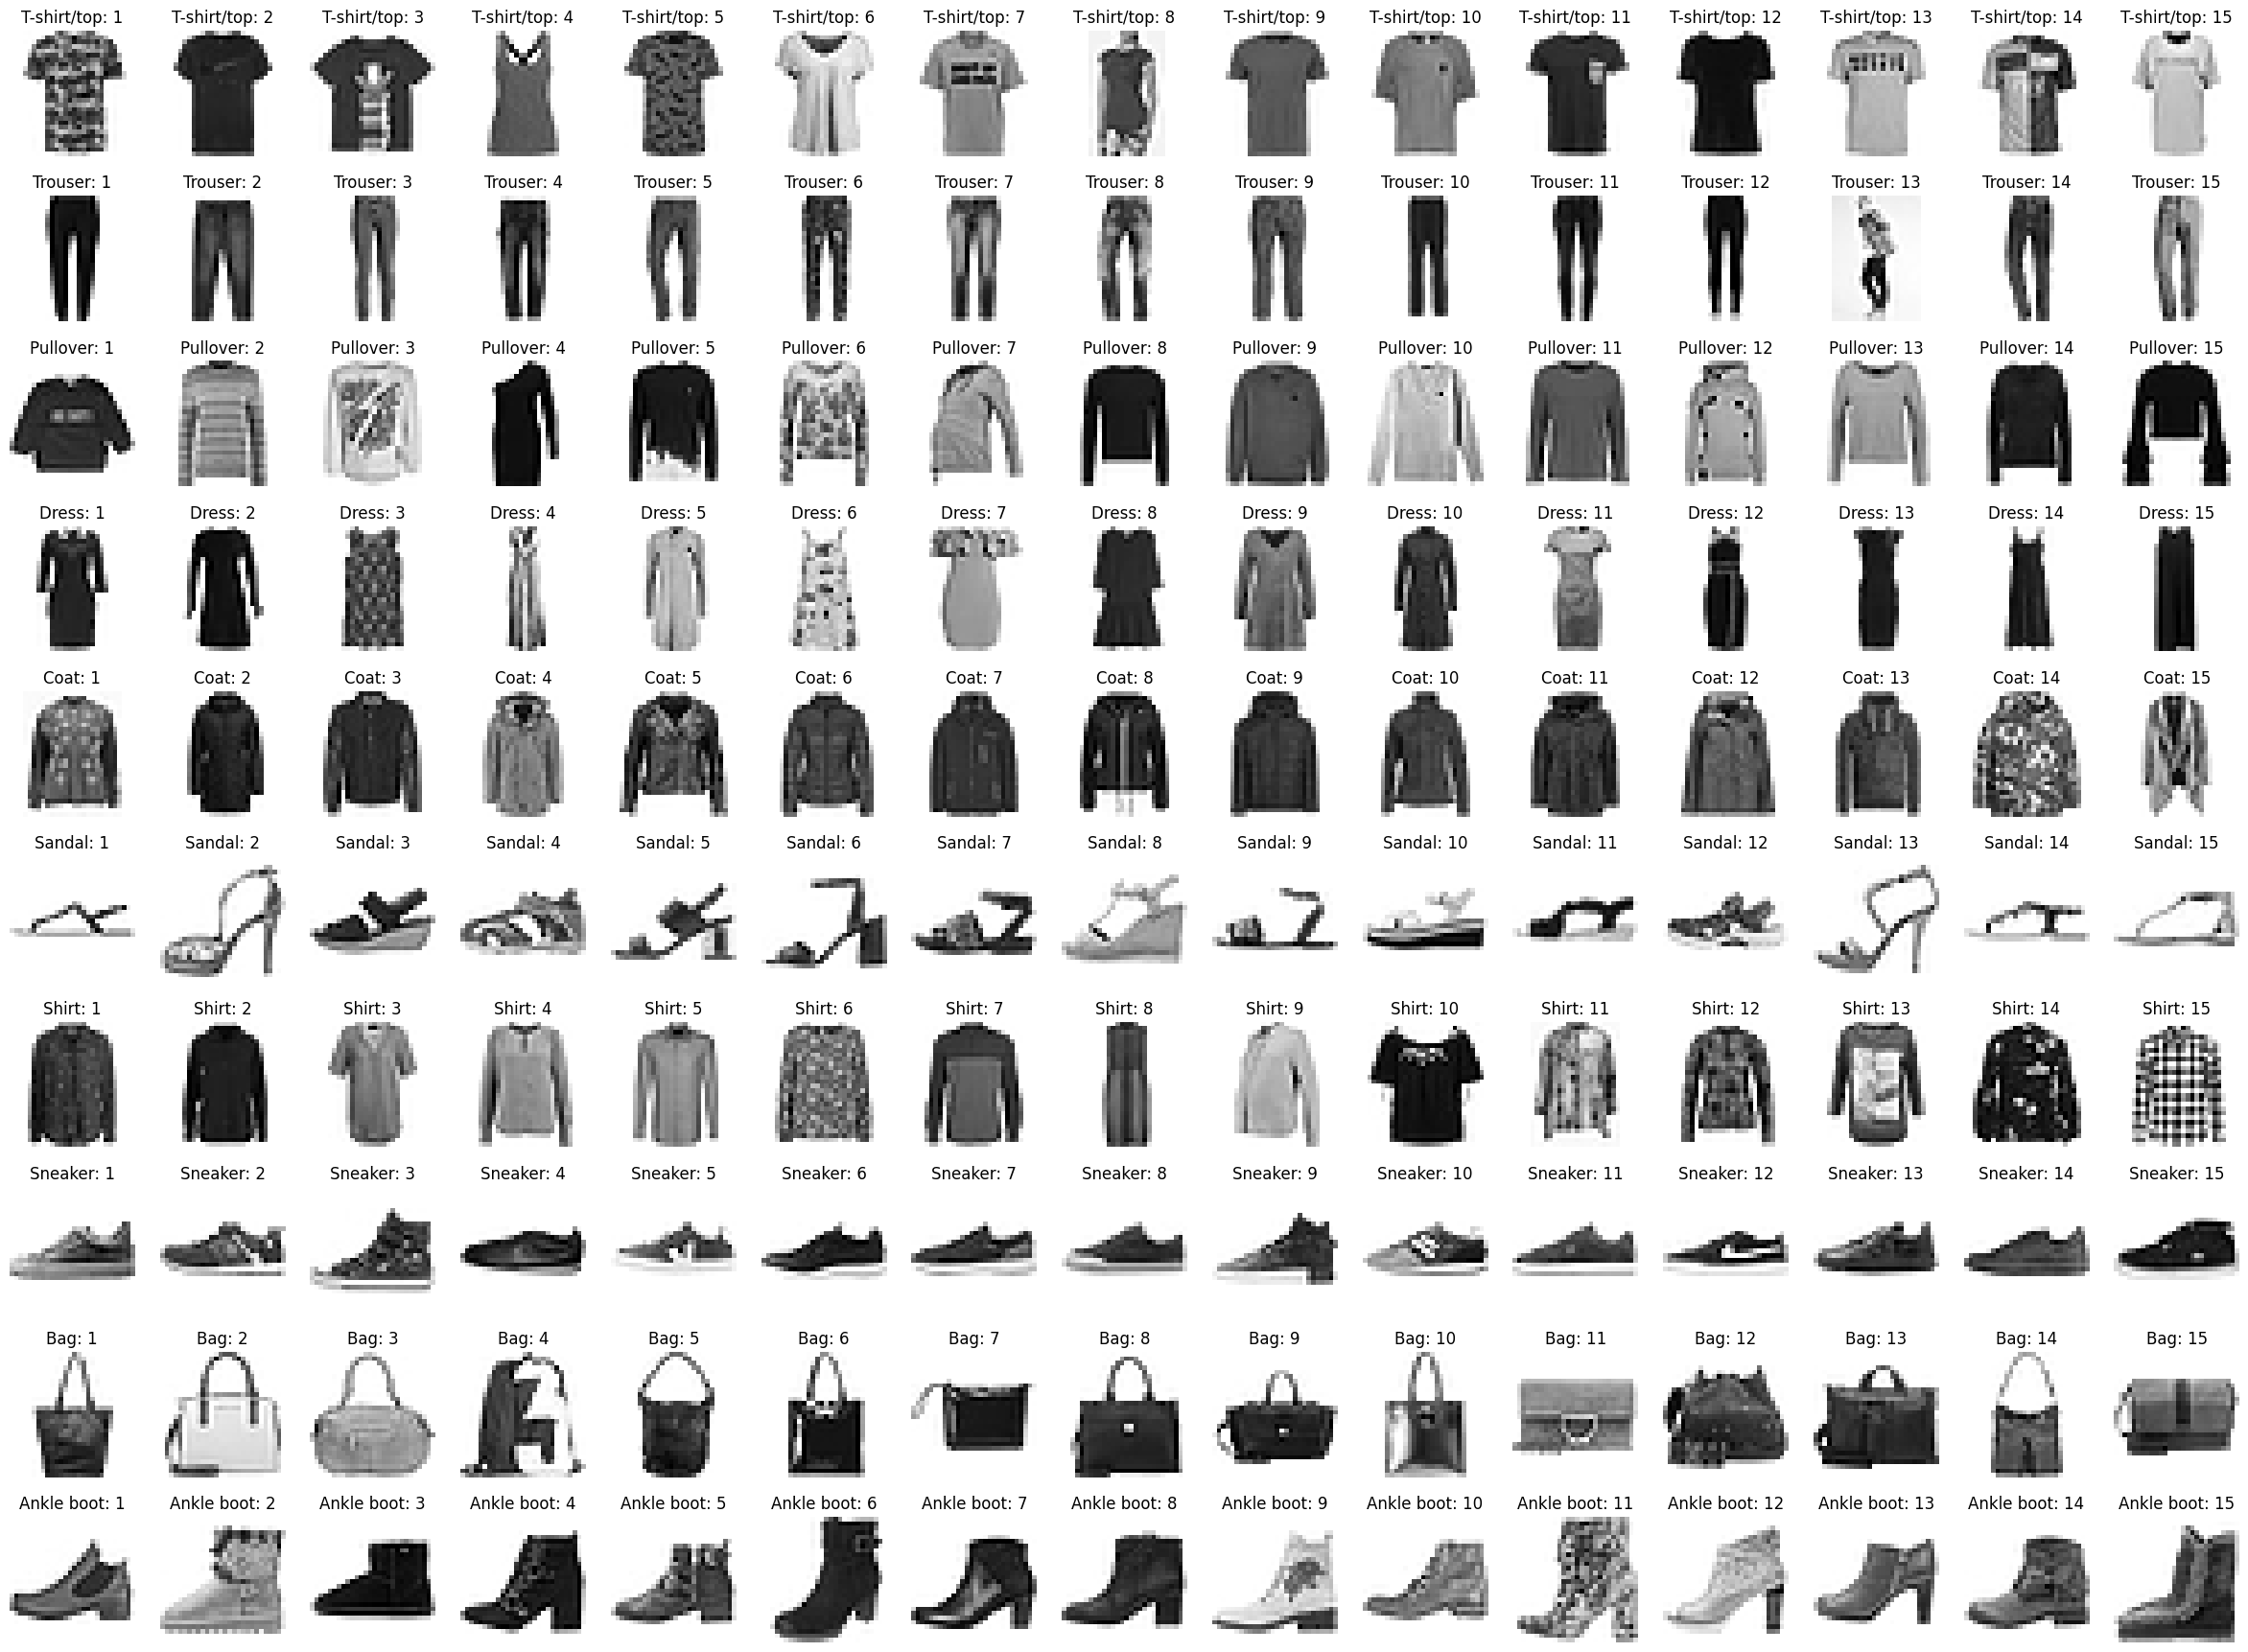

In [158]:
fig, axes = plt.subplots(nrows=10,ncols=15, figsize=(30, 22))

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i, label in enumerate(labels):
    df_item = df_train[df_train.label == i]
    X = df_item.drop('label', axis=1).values
    for j, img in enumerate(X[:15]):
        axes[i,j].imshow(X[j].reshape(28,28), cmap=plt.cm.binary)
        axes[i,j].set_title(f'{labels[i]}: {j + 1}')
        axes[i,j].grid(False)
        axes[i,j].axis("off")

        

- Generating heatmap of image.

<Axes: >

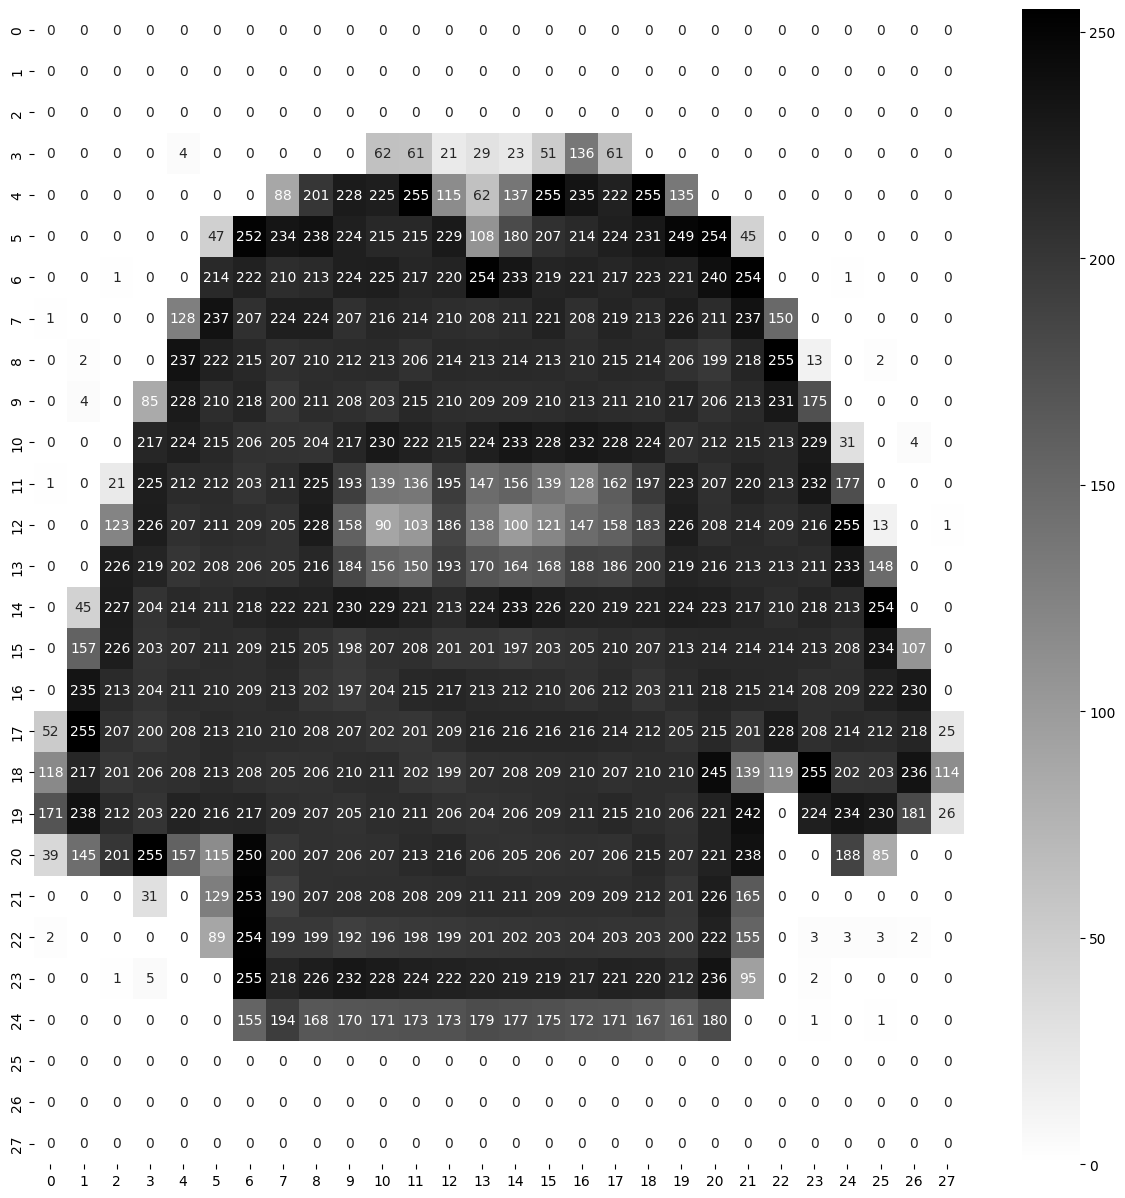

In [159]:
X_train = df_train.drop("label", axis=1).values
y_train = df_train.label

y_train
plt.figure(figsize=(15,15))
sns.heatmap(data=X_train[0].reshape(28,28), annot=True, cmap='binary', fmt="1")


- Pixel distribution.

<Axes: ylabel='Count'>

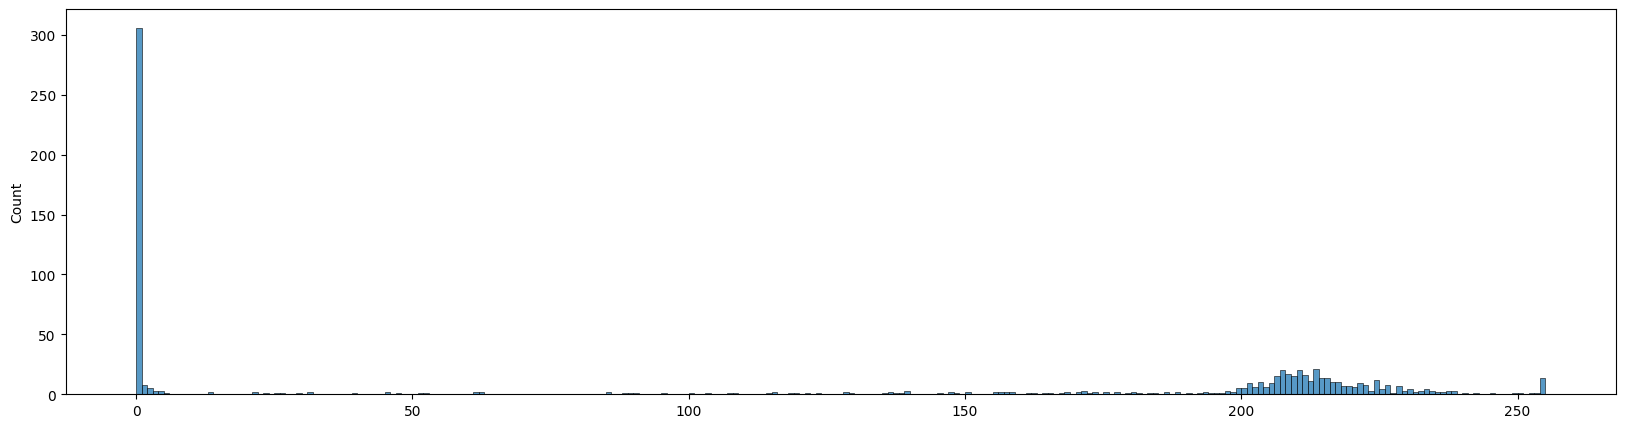

In [160]:
plt.figure(figsize=(20,5))
sns.histplot(data=X_train[0], bins=255)

### __Implementing models__

In [161]:
# Dynamically create a neural network model with a variable number of layers and nodes per layer.
def create_model(no_of_layers, nodes=800):
    initial_nodes = nodes
    model_layers = []
    for i in range(1, no_of_layers + 1 ):
        nodes = initial_nodes * (1 / i)
        initial_nodes = int(nodes)
        if initial_nodes <= 10:
            break
        model_layers.append(layers.Dense(initial_nodes,activation="relu"))
        
    if initial_nodes <= 10:
        print("Number of last layer shoud not be less than number of class. Increase the number of nodes to avoid less nodes") 
    else:
        model_layers.append(layers.Dense(10, activation="softmax"))
        model = keras.Sequential(model_layers)
        return model

In [162]:
models = []
no_of_models = 5

for i in range(1, no_of_models + 1):
    models.append(create_model(i,1400))
    
models = [model for model in models if model is not None]
len(models)


5

- Define the Loss Function, Optimizer and Metrics

In [163]:
for model in models: model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

- Splitting in validation and test dataset.

In [164]:
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test,test_size=0.5, random_state=48)

- Normalizing datasets

In [165]:
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255
X_validation_normalized = X_validation / 255

- Training the models

In [166]:
for model in models:
    print(f"Model with total layers: {len(model.layers)}")
    model.fit(X_train, y_train, epochs=5, batch_size=128)
    model.summary()

Model with total layers: 2
Epoch 1/5


469/469 [==============================] - 8s 15ms/step - loss: 24.9468 - accuracy: 0.7201
Epoch 2/5
469/469 [==============================] - 7s 16ms/step - loss: 0.8525 - accuracy: 0.8025
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.6270 - accuracy: 0.8268
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.5814 - accuracy: 0.8375
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.5312 - accuracy: 0.8487
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_405 (Dense)           (None, 1400)              1099000   
                                                                 
 dense_406 (Dense)           (None, 10)                14010     
                                                                 
Total params: 1,113,010
Trainable params: 1,113,010
Non-trainable params: 0
______________

### __Evaluate the Model__

In [167]:
def calculate_scores(model):
    y_predicted = np.argmax(model.predict(X_validation), axis=-1)

    return {
        "Accuracy score": accuracy_score(y_validation, y_predicted),
        "Precision score":precision_score(y_validation, y_predicted, average='weighted'),
        "Recall score":recall_score(y_validation, y_predicted, average='weighted'),
        "F1 score":f1_score(y_validation, y_predicted, average='weighted')
    }
    
scores = {}
for model in models:
    scores[str(len(model.layers))] = calculate_scores(model)
    
df_scores = pd.DataFrame(scores)
df_scores

 17/157 [==>...........................] - ETA: 0s

157/157 [==============================] - 1s 4ms/step


d:\College\Foundation of ML\labs\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,2,3,4,5,6
Accuracy score,0.861200,0.862600,0.863400,0.694800,0.103000
Precision score,0.862676,0.871796,0.868386,0.689316,0.010609
Recall score,0.861200,0.862600,0.863400,0.694800,0.103000
F1 score,0.856581,0.862908,0.857877,0.662957,0.019237


Text(0, 0.5, 'Scores')

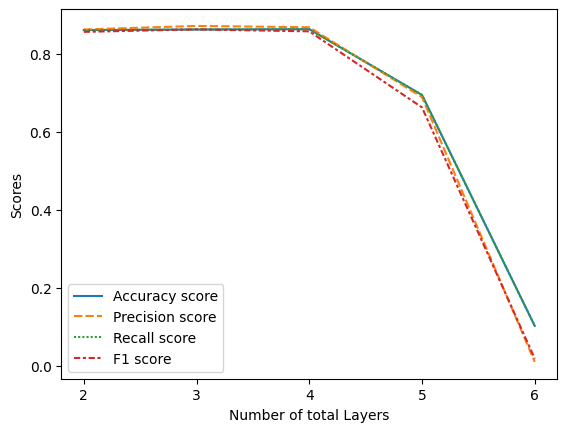

In [168]:
fig = sns.lineplot(data=df_scores.T)
fig.set_xlabel("Number of total Layers")
fig.set_ylabel("Scores")

> As from above line graph we can see that as number of layers increses performance of the model tends to decline.

### __Running Models on test data__

In [169]:
y_predicted_test = np.argmax(models[0].predict(X_test), axis=-1)

print(f"Test Accuracy: {accuracy_score(y_test, y_predicted_test)}")
print(f"Test Precision: {precision_score(y_test, y_predicted_test, average='weighted')}")
print(f"Test Recall: {recall_score(y_test, y_predicted_test, average='weighted')}")

 30/157 [====>.........................] - ETA: 0s

157/157 [==============================] - 1s 3ms/step
Test Accuracy: 0.853
Test Precision: 0.8544436078019815
Test Recall: 0.853


> It can be observed that scores on the test data have not changed much, which indicates a consistent performance of the model across different evaluations or iterations.

### __Increase Precision and Recall for Class '5' Without Changing the Model or Retraining.__

In [174]:
model = models[0]

y_predicted_validation_revised = np.where(model.predict(X_validation)[:, 5] < 0.5, 5, y_predicted_test)

revised_precision = precision_score(y_validation, y_predicted_validation_revised,  average='weighted')
revised_recall = recall_score(y_validation, y_predicted_validation_revised, average='weighted')

print(f'Precision score after increasing: {revised_precision}')
print(f'Recall score after increasing: {revised_recall}')

 19/157 [==>...........................] - ETA: 0s

157/157 [==============================] - 1s 4ms/step
Precision score after increasing: 0.0035638084563173293
Recall score after increasing: 0.0152


__References:__
- [https://www.kaggle.com/code/kutubkapadia/fashion-mnist-with-tensorflow](https://www.kaggle.com/code/kutubkapadia/fashion-mnist-with-tensorflow)
- [https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03A_minimal_mnist_keras.ipynb](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03A_minimal_mnist_keras.ipynb)